<a href="https://colab.research.google.com/github/mozey256/OSCAAR/blob/main/chemo_data_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing necessary libraries

In [5]:
!pip install pycaret
!pip install mlflow
!pip install pandas-profiling
!pip install evidently
!pip install pycaret[mlops]
!pip install gradio
!pip install m2cgen
!pip install pip install autoviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [3]:
from pycaret.datasets import get_data
from pycaret.classification import *
from sklearn.impute import SimpleImputer
#from pandas_profiling import ProfileReport
import missingno as msno
import mlflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## load the data set

In [4]:
chem_data = pd.read_csv('./fillmissing_chemo_data.csv')

In [5]:
chem = chem_data

In [6]:
chem.head()

,NAME,2aminobenzothiazole_conc3_T30,2hydroxyethylhydrazine_conc3_T30,3aminotriazole_conc3_T30,4hydroxytamoxifene_conc3_T30,A23187_conc3_T30,abietic-acid_conc3_T30,acifluorofen-methyl_conc3_T30,aconitine_conc3_T30,agelasine_conc3_T30,...,thiabendazole_conc3_T30,thozonium-bromide_conc3_T30,tomatine_conc3_T30,trichostatinA_conc3_T30,trimethoprim_conc3_T30,tunicamycin_conc3_T30,usnic-acid_conc3_T30,valinomycin_conc3_T30,verrucarin_conc3_T30,ZnCl2_conc3_T30
0,CNAG_02695,-12.390959,99.463196,-47.518637,-8.810942,4.297480,-17.596990,-11.436236,-10.310285,35.952584,...,-27.897476,34.798421,6.037690,-125.625952,29.129570,70.102756,-17.918227,-2.355947,33.778516,80.812676
1,CNAG_06761,26.735925,-1.900895,18.639025,-229.150985,73.488603,0.910867,-48.800696,-1.171001,-297.873286,...,38.358847,2.335099,14.473617,1.344102,56.453545,-3.168274,-49.071984,-0.713006,-2.688197,-121.099541
2,CNAG_01862,-0.944822,-1.900895,118.536041,-108.495497,117.847484,0.910867,38.534702,-1.171001,-0.236123,...,13.051399,101.798766,-19.548246,1.344102,-24.539292,-194.570508,18.674033,-0.713006,-2.688197,-169.371448
3,CNAG_03664,-29.498142,-72.341975,-110.532908,34.647391,-88.657068,11.595300,-20.262663,-14.025310,37.577135,...,29.391496,-38.587139,-92.325338,-67.183398,-15.017046,-44.875864,76.052004,-142.573033,-24.080345,-105.019880
4,CNAG_01181,-47.704215,123.927046,72.732075,18.603897,-5.247973,27.610765,-37.733011,-35.406175,-3.568782,...,-1.641310,-1.832095,-54.107417,86.496364,-22.360077,40.110359,-3.459980,-33.460913,34.692855,6.887958


In [7]:
# Remove the '_conc3_T30' extension from column names
chem.columns = chem.columns.str.replace('_conc3_T30', '')

# Save the modified DataFrame back to a CSV file
chem.to_csv('modified_file.csv', index=False)

In [8]:
#load the modified data

mdata = pd.read_csv('/content/modified_file.csv')

In [9]:
mdata.head()

,NAME,2aminobenzothiazole,2hydroxyethylhydrazine,3aminotriazole,4hydroxytamoxifene,A23187,abietic-acid,acifluorofen-methyl,aconitine,agelasine,...,thiabendazole,thozonium-bromide,tomatine,trichostatinA,trimethoprim,tunicamycin,usnic-acid,valinomycin,verrucarin,ZnCl2
0,CNAG_02695,-12.390959,99.463196,-47.518637,-8.810942,4.297480,-17.596990,-11.436236,-10.310285,35.952584,...,-27.897476,34.798421,6.037690,-125.625952,29.129570,70.102756,-17.918227,-2.355947,33.778516,80.812676
1,CNAG_06761,26.735925,-1.900895,18.639025,-229.150985,73.488603,0.910867,-48.800696,-1.171001,-297.873286,...,38.358847,2.335099,14.473617,1.344102,56.453545,-3.168274,-49.071984,-0.713006,-2.688197,-121.099541
2,CNAG_01862,-0.944822,-1.900895,118.536041,-108.495497,117.847484,0.910867,38.534702,-1.171001,-0.236123,...,13.051399,101.798766,-19.548246,1.344102,-24.539292,-194.570508,18.674033,-0.713006,-2.688197,-169.371448
3,CNAG_03664,-29.498142,-72.341975,-110.532908,34.647391,-88.657068,11.595300,-20.262663,-14.025310,37.577135,...,29.391496,-38.587139,-92.325338,-67.183398,-15.017046,-44.875864,76.052004,-142.573033,-24.080345,-105.019880
4,CNAG_01181,-47.704215,123.927046,72.732075,18.603897,-5.247973,27.610765,-37.733011,-35.406175,-3.568782,...,-1.641310,-1.832095,-54.107417,86.496364,-22.360077,40.110359,-3.459980,-33.460913,34.692855,6.887958


In [10]:
mdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Columns: 125 entries, NAME to ZnCl2
dtypes: float64(124), object(1)
memory usage: 1.4+ MB


In [11]:
mdata.describe()

,2aminobenzothiazole,2hydroxyethylhydrazine,3aminotriazole,4hydroxytamoxifene,A23187,abietic-acid,acifluorofen-methyl,aconitine,agelasine,alamethicin,...,thiabendazole,thozonium-bromide,tomatine,trichostatinA,trimethoprim,tunicamycin,usnic-acid,valinomycin,verrucarin,ZnCl2
count,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,...,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000
mean,-3.259671,-1.900895,1.927553,-2.586860,0.520220,0.910867,-0.469433,-1.171001,-0.236123,-2.941660,...,-1.329431,-0.102921,-3.095922,1.344102,0.174904,-2.540051,-1.293033,-0.713006,-2.688197,-1.297769
std,33.066458,42.592975,45.769377,28.950207,24.462402,23.882718,24.682649,26.808442,26.848937,27.487302,...,38.943943,21.431140,37.230370,20.672668,26.621270,57.211040,21.412497,30.736464,26.510357,27.502170
min,-371.385938,-425.235728,-395.478995,-400.171641,-198.099914,-376.301691,-400.885844,-437.180055,-365.125912,-210.499068,...,-188.729555,-146.387238,-383.835539,-358.366759,-118.804684,-429.860597,-102.415940,-438.528773,-440.556178,-242.398371
25%,-18.010199,-16.759529,-16.524108,-10.193720,-12.199915,-10.276860,-12.684524,-9.696545,-9.654307,-14.917426,...,-23.847532,-10.599955,-20.897468,-6.853540,-14.375137,-27.515381,-13.127589,-10.997569,-10.404573,-13.126277
50%,-1.819928,-1.793272,2.681695,-0.771282,-0.226330,0.910867,0.163052,-0.364536,1.144236,-2.790993,...,-0.807225,-0.815978,-0.765537,1.344102,1.091212,0.073090,-0.694025,0.806058,0.206643,-0.138352
75%,14.520784,18.090018,21.416787,9.296674,12.425899,12.801467,12.666982,9.837775,11.408326,10.237916,...,22.239602,10.153282,16.999885,8.906759,15.874447,29.160638,10.695728,12.747758,8.947019,11.167245
max,108.770371,223.063183,268.118561,75.530561,118.597040,119.521476,88.409488,142.516313,155.004199,152.066598,...,134.360324,101.798766,154.291009,186.841095,124.446323,321.110502,82.523704,161.446366,134.951335,158.757308


<Axes: >

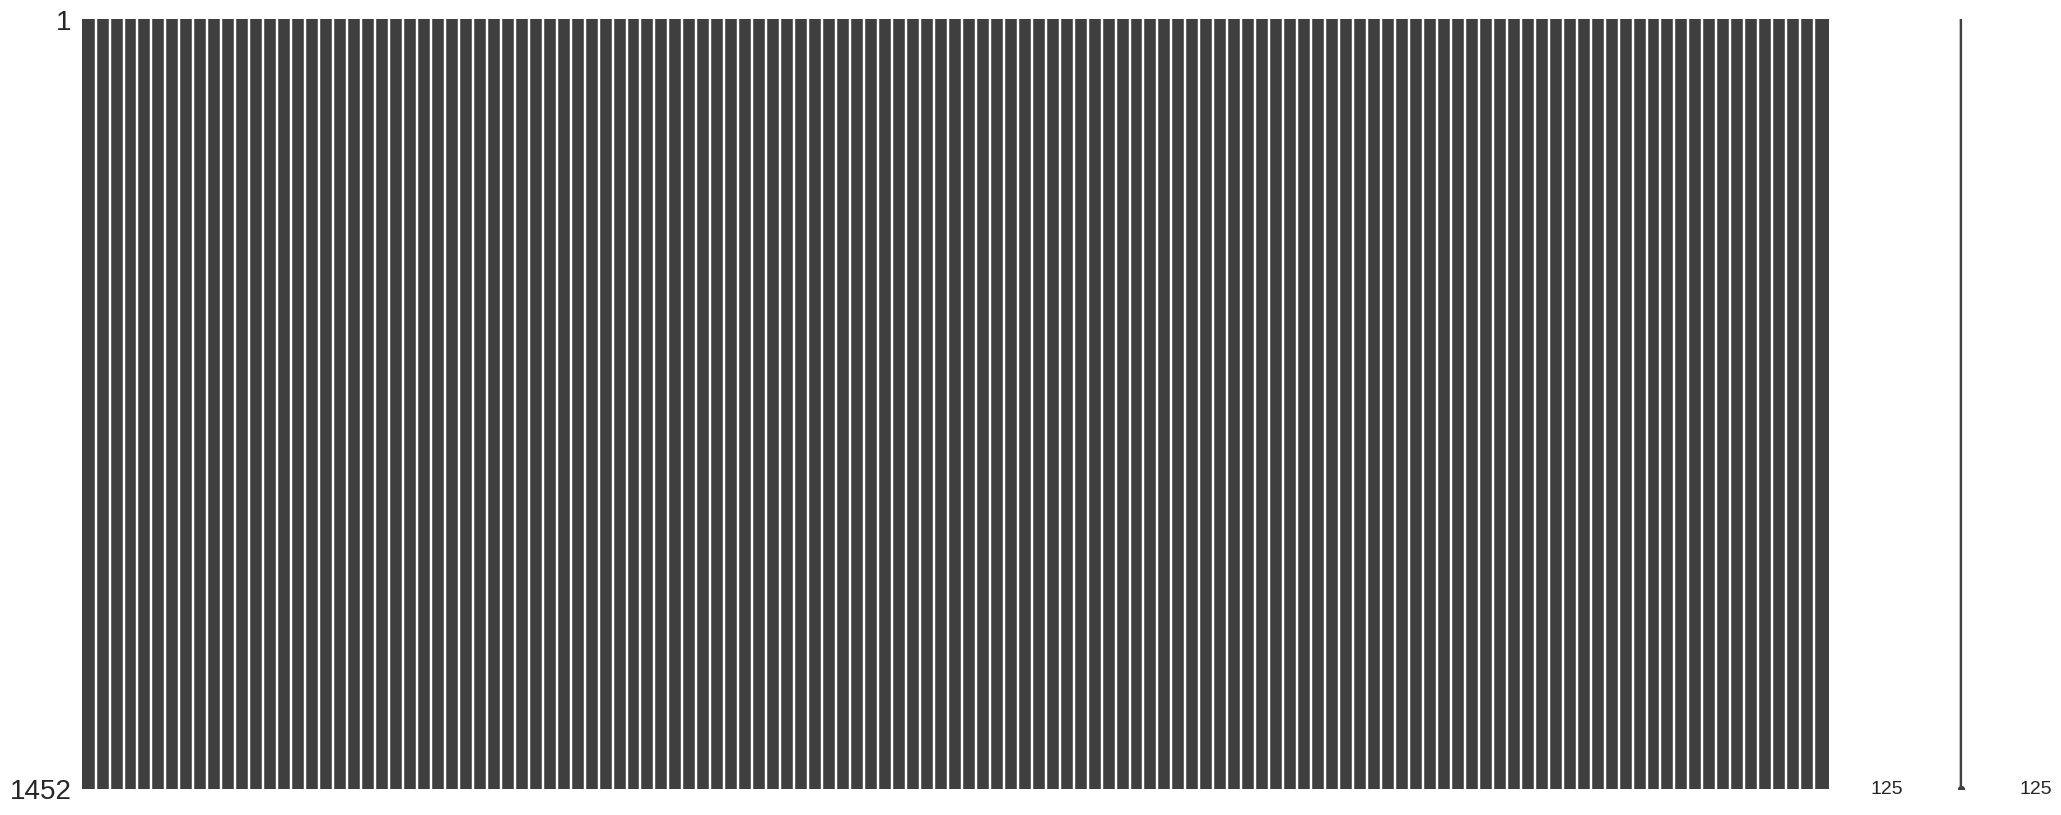

In [12]:
msno.matrix(mdata)

In [13]:
# Check for missing values
print(chem.isnull().sum())

NAME                      0
2aminobenzothiazole       0
2hydroxyethylhydrazine    0
3aminotriazole            0
4hydroxytamoxifene        0
                         ..
tunicamycin               0
usnic-acid                0
valinomycin               0
verrucarin                0
ZnCl2                     0
Length: 125, dtype: int64


In [15]:
mdata.shape

(1452, 125)

In [16]:
mdata["NAME"].value_counts()

CNAG_02695    1
CNAG_04197    1
CNAG_04092    1
CNAG_01372    1
CNAG_04530    1
             ..
CNAG_03173    1
CNAG_04416    1
CNAG_03280    1
CNAG_04943    1
+2.5 stdev    1
Name: NAME, Length: 1452, dtype: int64

In [ ]:
# Distribution of the target variable
sns.countplot(x='2aminobenzothiazole', data=chem)
plt.title('Distribution of Combination')
plt.show()

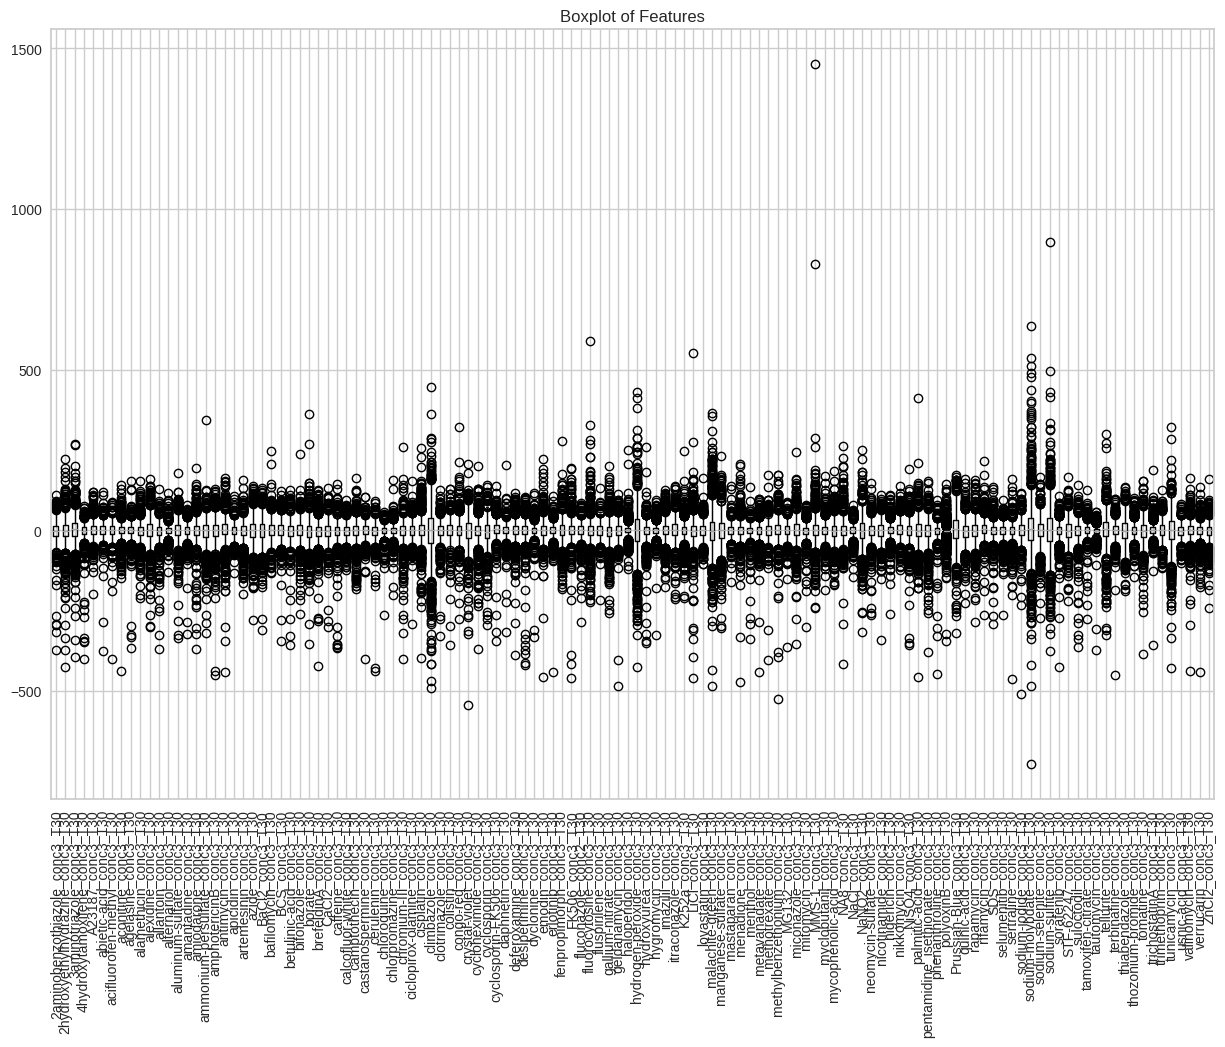

In [11]:
# Boxplot of each feature
chem.boxplot(figsize=(15, 10))
plt.title('Boxplot of Features')
plt.xticks(rotation=90)
plt.show()

In [ ]:

from ydata_profiling import ProfileReport

profile = ProfileReport(chem, title="Chemogenomic data")

profile.to_notebook_iframe()

profile.to_file("chem_data_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

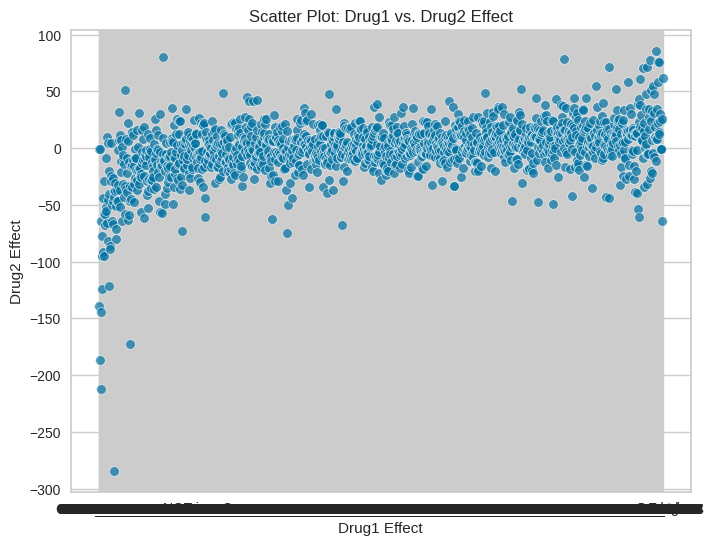

In [12]:
# Example: Create a scatter plot between Drug1_effect and Drug2_effect
plt.figure(figsize=(8, 6))
sns.scatterplot(x='NAME', y='fluconazole_conc2_T30', data=chem, alpha=0.7)
plt.xlabel('Drug1 Effect')
plt.ylabel('Drug2 Effect')
plt.title('Scatter Plot: Drug1 vs. Drug2 Effect')
plt.grid(True)
plt.show()